## 4.10 Coding Etiquette & Excel Reporting part 2

### This script contains the following points:

#### 1. Create data to experiment on
#### 2. Create function to add profile column to data frame
#### 3. Create visualizations


In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import newest version of data
path = r'/Users/rachelallen/CareerFoundry Achievement 4/08-2022 Instacart Basket Analysis'

In [3]:
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_flagged.pkl'))

In [4]:
#check data
df_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,flagged,product_id,add_to_cart_order,reordered,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,no_first_name,region,Profile
0,2539329.0,1.0,1.0,2.0,8.0,NaN,No Previous Order,196,1.0,0.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other
1,2398795.0,1.0,2.0,3.0,7.0,15.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other
2,473747.0,1.0,3.0,3.0,12.0,21.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other
3,2254736.0,1.0,4.0,4.0,7.0,29.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other
4,431534.0,1.0,5.0,4.0,15.0,28.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other


In [6]:
df_all.shape

(32435070, 39)

In [7]:
df_all.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,mean_order,max_order,mean_spending,median_days_since_prior,Age,n_dependants,income
count,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.035696e+07,3.243507e+07,3.243506e+07,3.243506e+07,3.240487e+07,3.240487e+07,3.240487e+07,3.240487e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07
mean,1.710748e+06,1.029372e+05,1.714195e+01,2.738815e+00,1.342498e+01,1.110414e+01,2.557635e+04,8.351081e+00,5.896955e-01,7.119612e+01,9.919794e+00,1.198022e+01,1.714231e+01,3.305231e+01,1.197850e+01,1.039779e+01,4.946512e+01,1.501877e+00,9.943550e+04
std,9.873006e+05,5.946651e+04,1.753496e+01,2.090051e+00,4.246357e+00,8.778941e+00,1.409657e+04,7.126656e+00,4.918889e-01,3.821138e+01,6.281486e+00,4.956554e+02,8.663542e-01,2.515463e+01,8.321715e+01,7.131238e+00,1.848555e+01,1.118869e+00,4.305540e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.521575e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559430e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353200e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.658354e+01,1.300000e+01,7.387179e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700200e+04
50%,1.711047e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,1.722580e+01,2.600000e+01,7.824742e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,1.781140e+01,4.700000e+01,8.253968e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,2.290238e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [8]:
df_all['Profile'].value_counts(dropna = False)

Other                    28322054
Older and independent     3944157
Young Parents              162001
Young and Single             6858
Name: Profile, dtype: int64

There are definitely more profiles to be created but my computer is really struggling with this dataframe at this size


In [9]:
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'flagged', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Exists', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'mean_order', 'max_order',
       'loyalty_flag', 'mean_spending', 'spending_flag',
       'median_days_since_prior', 'frequency_flag', 'First Name', 'Last Name',
       'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'no_first_name', 'region', 'Profile'],
      dtype='object')

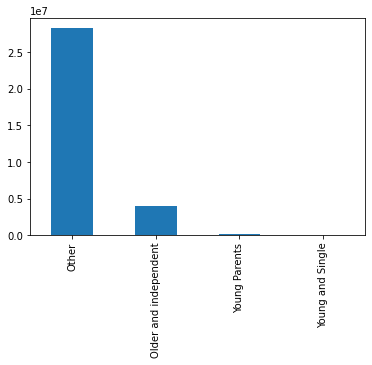

In [10]:
# 6 Create an appropriate visualization to show the distribution of profiles.

profile_bar = df_all['Profile'].value_counts().plot.bar()

In [11]:
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_bar.png'))

In [12]:
# 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

df_all.groupby('Profile').agg({'order_number':['mean', 'min', 'max']})

order_number           
                              mean  min   max
Profile                                      
Older and independent    17.453301  1.0  99.0
Other                    17.100023  1.0  99.0
Young Parents            16.952340  1.0  99.0
Young and Single         15.684019  1.0  99.0

In [13]:
df_all.groupby('Profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
Profile                                       
Older and independent  14.828002  1.0  99999.0
Other                  11.610429  1.0  99999.0
Young Parents           7.480785  1.0     15.0
Young and Single        7.732633  1.0     15.0

In [14]:
# 8 Compare your customer profiles with regions and departments

crosstab = pd.crosstab(df_all['Profile'], df_all['region'], dropna = False)

In [15]:
crosstab

region,Midwest,No State,Northeast,South,West
Profile,,,,,
Older and independent,938138,0,680459,1300153,1025407
Other,6626488,11,5017162,9445423,7232970
Young Parents,37554,0,29261,54529,40657
Young and Single,1836,0,1562,1877,1583


In [16]:
#wait I am seeing that super high max price again
df_all['prices'].max()

99999.0

In [17]:
df_all.loc[df_all['prices'] > 100, 'prices'] = np.nan

In [19]:
df_all['prices'].max()

25.0

In [20]:
df_all.groupby('Profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                           mean  min   max
Profile                                   
Older and independent  7.958344  1.0  25.0
Other                  7.769482  1.0  25.0
Young Parents          7.480785  1.0  15.0
Young and Single       7.732633  1.0  15.0

In [21]:
crosstab2 = pd.crosstab(df_all['Profile'], df_all['department_id'], dropna = False)

In [22]:
crosstab2

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Profile,,,,,,,,,,,,,,,,,,,,,
Older and independent,275094,4466,146782,1181179,19872,33928,312580,12741,108408,3849,...,91392,233659,82925,133353,665533,86577,52776,305004,129090,7908
Other,1959649,31825,1025646,8298112,126966,235325,2375545,84975,758219,30724,...,617535,1641711,620109,934705,4733215,547610,313506,2582547,922159,61240
Young Parents,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,104481,57520,0,0,0
Young and Single,0,0,0,0,6858,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Makes sense based on how I set up the profiles. I think I'm going to redo them to be a little more general and have more categories.

In [23]:
df_all['fam_status'].value_counts(dropna = False)

married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
NaN                                       11
Name: fam_status, dtype: int64

In [24]:
df_all_test = df_all[:10000]

In [27]:
def profile(row):

  if (row['Age'] <= 30) & ((row['fam_status'] == 'single') or (row['fam_status'] == 'divorced/widowed')) :
    return 'young and single'
  elif (row['Age'] <= 30) & (row['fam_status'] == 'married'):
    return 'young and married'
  elif (row['Age'] <= 30) & (row['fam_status'] == 'living with parents and siblings'):
    return 'young lives with fam'
  elif (row['Age'] > 30) & ((row['fam_status'] == 'single') or (row['fam_status'] == 'divorced/widowed')) :
    return 'older and single'
  elif (row['Age'] > 30) & (row['fam_status'] == 'married'):
    return 'older and married'
  elif (row['Age'] > 30) & (row['fam_status'] == 'living with parents and siblings'):
    return 'older lives with fam'
  elif (row['Age'] <= 30) & (row['income'] > 96612.0 ):
    return 'younger high income'
  elif (row['Age'] <= 30) & (row['income'] <= 96612.0 ):
    return 'younger low income'
  elif (row['Age'] > 30) & (row['income'] > 96612.0 ):
    return 'older high income'
  elif (row['Age'] > 30) & (row['income'] <= 96612.0 ):
    return 'older low income'
  elif (row['Age'] <= 30) & (row['n_dependants'] == 0 ):
    return 'young no children'
  elif (row['Age'] <= 30) & (row['n_dependants'] > 0 ):
    return 'young parent'
  elif (row['Age'] > 30) & (row['n_dependants'] == 0 ):
    return 'older no children'
  elif (row['Age'] > 30) & (row['n_dependants'] > 0 ):
    return 'older parent'
  elif (row['Age'] <= 30) & (row['department_id'] == 18 ):
    return 'younger shops for babies'
  elif (row['Age'] > 30) & (row['department_id'] == 18 ):
    return 'older shops for babies'
  elif (row['Age'] <= 30) & (row['department_id'] == 5 ):
    return 'younger shops for alcohol'
  elif (row['Age'] > 30) & (row['department_id'] == 5 ):
    return 'older shops for alcohol'
  else:
    return'Other'


In [28]:
df_all_test['profile test'] = df_all_test.apply(profile, axis = 1)

/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_866/4156287380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_test['profile test'] = df_all_test.apply(profile, axis = 1)


In [30]:
df_all_test.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,flagged,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,n_dependants,fam_status,income,no_first_name,region,Profile,profile test
0,2539329.0,1.0,1.0,2.0,8.0,NaN,No Previous Order,196,1.0,0.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
1,2398795.0,1.0,2.0,3.0,7.0,15.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
2,473747.0,1.0,3.0,3.0,12.0,21.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
3,2254736.0,1.0,4.0,4.0,7.0,29.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
4,431534.0,1.0,5.0,4.0,15.0,28.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
5,3367565.0,1.0,6.0,2.0,7.0,19.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
6,550135.0,1.0,7.0,1.0,9.0,20.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
7,3108588.0,1.0,8.0,1.0,14.0,14.0,Previous Order,196,2.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
8,2295261.0,1.0,9.0,1.0,16.0,0.0,Previous Order,196,4.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married
9,2550362.0,1.0,10.0,4.0,8.0,30.0,Previous Order,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,Other,older and married


In [31]:
df_all_test['profile test'].value_counts(dropna = False)

older and married       4540
young and married       2967
older and single        1740
young lives with fam     593
young and single         160
Name: profile test, dtype: int64

Seems okay, so let's apply this to the entire dataframe

In [33]:
df_all['profile update'] = df_all.apply(profile, axis = 1)

In [34]:
df_all['profile update'].value_counts(dropna = False)

older and married       19369961
older and single         6459403
young and married        3407538
young and single         1645942
young lives with fam     1552215
Other                         11
Name: profile update, dtype: int64

In [36]:
#drop previous 'Profile' column as unnecessary

df_all = df_all.drop(columns = ['Profile'])

In [37]:
df_all.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,flagged,product_id,add_to_cart_order,reordered,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,no_first_name,region,profile update
0,2539329.0,1.0,1.0,2.0,8.0,NaN,No Previous Order,196,1.0,0.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
1,2398795.0,1.0,2.0,3.0,7.0,15.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
2,473747.0,1.0,3.0,3.0,12.0,21.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
3,2254736.0,1.0,4.0,4.0,7.0,29.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
4,431534.0,1.0,5.0,4.0,15.0,28.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
5,3367565.0,1.0,6.0,2.0,7.0,19.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
6,550135.0,1.0,7.0,1.0,9.0,20.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
7,3108588.0,1.0,8.0,1.0,14.0,14.0,Previous Order,196,2.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
8,2295261.0,1.0,9.0,1.0,16.0,0.0,Previous Order,196,4.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married
9,2550362.0,1.0,10.0,4.0,8.0,30.0,Previous Order,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name,South,older and married


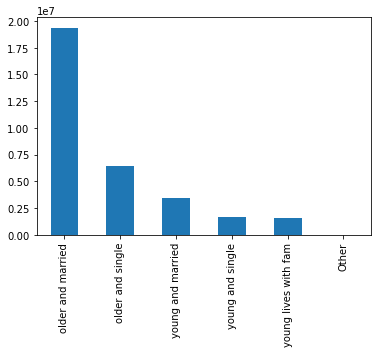

In [38]:
# 6 Create an appropriate visualization to show the distribution of profiles.

profile_bar = df_all['profile update'].value_counts().plot.bar()

In [39]:
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_bar_updated.png'))

In [41]:
# 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

df_all.groupby('profile update').agg({'order_number':['mean', 'min', 'max']})

order_number           
                             mean  min   max
profile update                              
Other                         NaN  NaN   NaN
older and married       17.108134  1.0  99.0
older and single        17.345918  1.0  99.0
young and married       16.971803  1.0  99.0
young and single        16.946327  1.0  99.0
young lives with fam    17.296007  1.0  99.0

In [44]:
# 8 Compare your customer profiles with regions and departments

crosstab3 = pd.crosstab(df_all['profile update'], df_all['region'], dropna = False)

In [45]:
crosstab3

region,Midwest,No State,Northeast,South,West
profile update,,,,,
Other,0,11,0,0,0
older and married,4537161,0,3443514,6434937,4954349
older and single,1535238,0,1121988,2138011,1664166
young and married,793060,0,596726,1132650,885102
young and single,371745,0,297728,566286,410183
young lives with fam,366812,0,268488,530098,386817


In [46]:
crosstab4 = pd.crosstab(df_all['profile update'], df_all['department_id'], dropna = False)

In [47]:
crosstab4

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
profile update,,,,,,,,,,,,,,,,,,,,,
Other,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,1,2,0,1,0,3
older and married,1333770,21214,699077,5662233,89711,160238,1607511,57577,517685,20855,...,426140,1122755,419591,637683,3220295,445439,253417,1722774,625920,41143
older and single,446504,7338,234972,1892164,31590,53598,537731,19531,170535,6552,...,138793,371673,139189,210448,1077055,143450,83414,574292,211931,13393
young and married,235280,3991,122804,991985,15971,28228,281541,9936,91978,3766,...,74722,195585,74134,114347,568303,77228,43745,306815,109769,7343
young and single,110656,1837,59433,483281,7528,14115,136711,5052,44727,1726,...,35291,95084,35388,54390,272307,37323,23080,146506,53214,3695
young lives with fam,108533,1911,56142,449628,8896,13074,124629,5620,41702,1674,...,33981,90272,34731,51190,260787,35226,20146,137163,50415,3571


In [51]:
# 9 Produce suitable charts to illustrate your results and export them in your project folder.

crosstab3.to_clipboard()

In [52]:
crosstab4.to_clipboard()

In [54]:
df_all['region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
No State           11
Name: region, dtype: int64

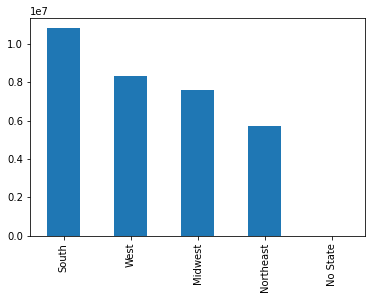

In [55]:
bar_region = df_all['region'].value_counts().plot.bar()

In [56]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region.png'))

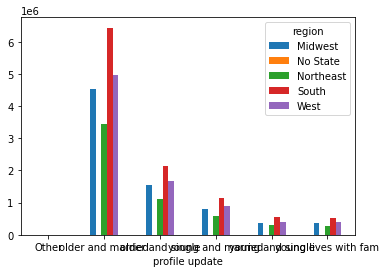

In [57]:
bar_crosstab3 = crosstab3.plot.bar(rot = 0)

In [58]:
bar_crosstab3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_profile.png'))

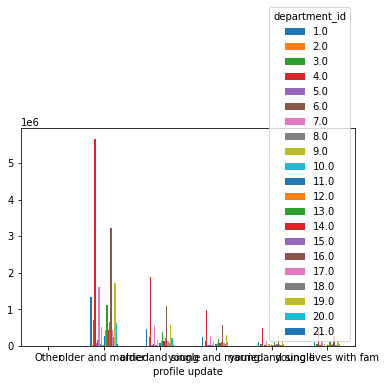

In [59]:
bar_crosstab4 = crosstab4.plot.bar(rot = 0)

In [60]:
bar_crosstab4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_departments.png'))

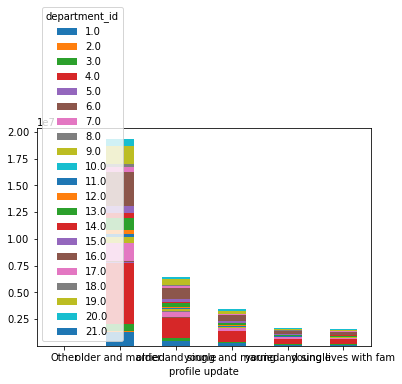

In [62]:
bar_crosstab4 = crosstab4.plot(kind = 'bar', stacked = True, rot = 0)

In [63]:
bar_crosstab4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_departments_stacked.png'))

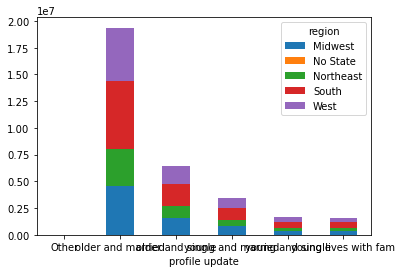

In [64]:
bar_crosstab5 = crosstab3.plot(kind = 'bar', stacked = True, rot = 0)

In [65]:
bar_crosstab5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_regions_stacked.png'))

In [66]:
profile_agg1 = df_all.groupby('profile update').agg({'order_number':['mean', 'min', 'max']})

<AxesSubplot:xlabel='profile update'>

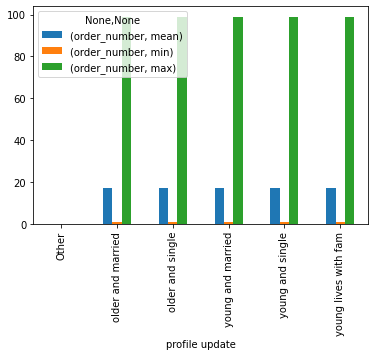

In [67]:
profile_agg1.plot(kind = 'bar')

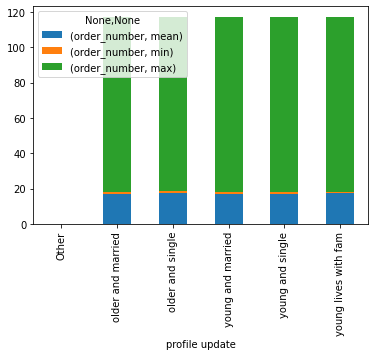

In [70]:
profile_agg1 = profile_agg1.plot(kind = 'bar', stacked = True)

In [71]:
profile_agg1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_agg_stacked.png'))

In [72]:
#export file

df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))

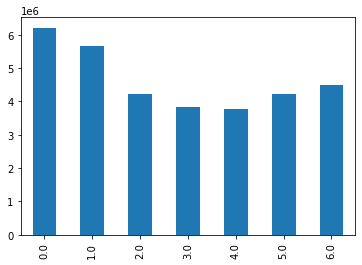

In [73]:
bar_day = df_all['order_day_of_week'].value_counts().sort_index().plot.bar()

In [74]:
bar_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow.png'))

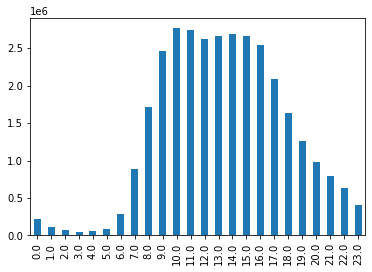

In [76]:
bar_hour = df_all['order_hour'].value_counts().sort_index().plot.bar()

In [77]:
bar_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour.png'))

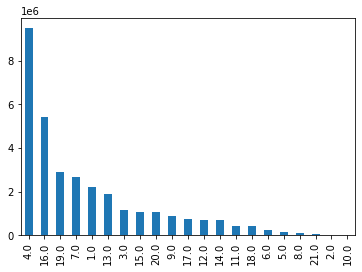

In [78]:
bar_department = df_all['department_id'].value_counts().plot.bar()

In [79]:
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

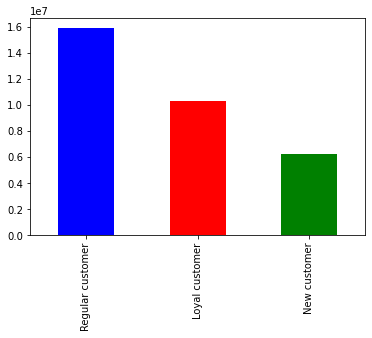

In [82]:
loyalty_bar = df_all['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'red', 'green'])

In [84]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [85]:
df_all.groupby('loyalty_flag').agg({'order_number': ['mean', 'max', 'min']})

order_number           
                         mean   max  min
loyalty_flag                            
Loyal customer      32.639706  99.0  1.0
New customer         3.806997  10.0  1.0
Regular customer    12.347103  40.0  1.0

In [86]:
loyalty_orders = df_all.groupby('loyalty_flag').agg({'order_number': ['mean', 'max', 'min']})

<AxesSubplot:xlabel='loyalty_flag'>

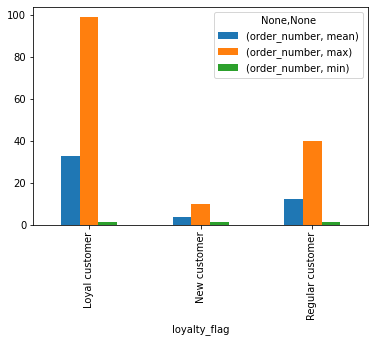

In [87]:
loyalty_orders.plot(kind = 'bar')

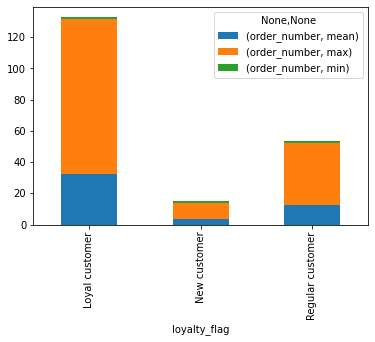

In [91]:
loyalty_orders_bar = loyalty_orders.plot(kind = 'bar', stacked = True)

In [92]:
loyalty_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_orders_stacked.png'))

In [94]:
region_orders = df_all.groupby('region').agg({'order_number': ['mean', 'max', 'min']})

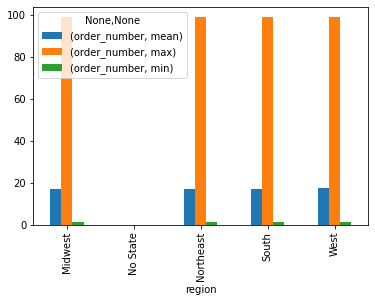

In [96]:
region_orders_bar = region_orders.plot(kind = 'bar')

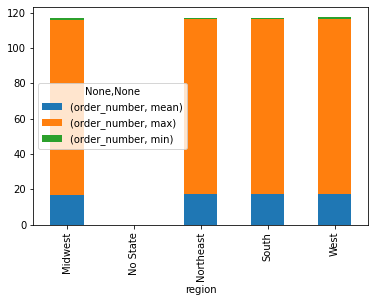

In [97]:
region_orders_bar2 = region_orders.plot(kind = 'bar', stacked = True)

In [98]:
region_orders_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_orders_stacked.png'))

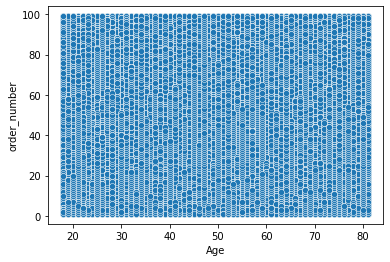

In [100]:
scatter_age_fam = sns.scatterplot(x = 'Age', y = 'order_number', data = df_all)

In [104]:
age_orders = df_all.groupby('Age').agg({'order_number': ['mean']})

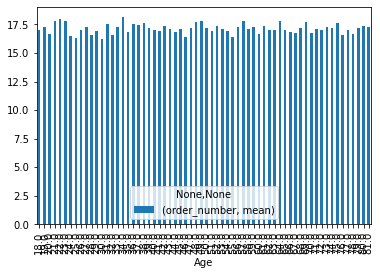

In [105]:
age_orders_bar = age_orders.plot(kind = 'bar')

In [106]:
age_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization' 'age_order_bar.png'))

In [112]:
fam_orders = df_all.groupby('fam_status').agg({'order_number': ['mean', 'min', 'max']})

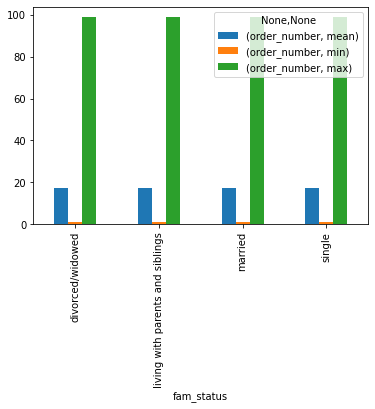

In [113]:
fam_orders_bar = fam_orders.plot(kind = 'bar')

In [115]:
fam_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_orders_bar.png'))

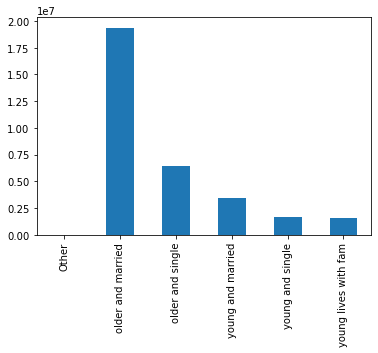

In [116]:
bar_profiles = df_all['profile update'].value_counts().sort_index().plot.bar()

In [117]:
bar_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_bar.png'))